In [14]:
import pandas as pd
#https://www.data.gouv.fr/datasets/demandes-de-valeurs-foncieres/#/resources/d573456c-76eb-4276-b91c-e6b9c89d6656
df = pd.read_csv("./ValeursFoncieres-2025-S1.txt", sep='|', on_bad_lines='skip')
df.head()

/tmp/ipykernel_12414/4137299869.py:3: DtypeWarning: Columns (18,23,24,26,28,29,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./ValeursFoncieres-2025-S1.txt", sep='|', on_bad_lines='skip')


,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2025,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,J,NaN,78.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2025,Vente,...,NaN,0,1.0,Maison,NaN,111.0,5.0,S,NaN,133.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2025,Vente,...,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,133.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2025,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,46.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2025,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,J,NaN,17.0


In [15]:
#drop the columns not used
exclusions = [
        'Identifiant de document',
        'Reference document',
        '1 Articles CGI',
        '2 Articles CGI',
        '3 Articles CGI',
        '4 Articles CGI',
        '5 Articles CGI',
        'No disposition',
        'Date mutation',
        'Nature mutation',
        #'Valeur fonciere',
        'No voie',
        'B/T/Q',
        'Type de voie',
        'Code voie',
        'Voie',
        'Code postal',
        #'Commune',
        #'Code departement',
        'Code commune',
        'Prefixe de section',
        #'Section',
        'No plan',
        'No Volume',
        '1er lot',
        'Surface Carrez du 1er lot',
        '2eme lot',
        'Surface Carrez du 2eme lot',
        '3eme lot',
        'Surface Carrez du 3eme lot',
        '4eme lot',
        'Surface Carrez du 4eme lot',
        '5eme lot',
        'Surface Carrez du 5eme lot',
        #'Nombre de lots',
        'Code type local',
        'Type local',
        'Identifiant local',
        #'Surface reelle bati',
        #'Nombre pieces principales',
        'Nature culture',
        'Nature culture speciale',
        'Surface terrain'
]
df = df.drop(columns=exclusions)

#remove the lines having NaN
df.dropna(inplace=True)
df.reset_index(names='Index', inplace=True)
df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',', '.').astype(float)
df['Code departement'] = df['Code departement'].replace({'2A': 2001, '2B': 2002})

In [16]:
#data overview
#list(df.columns)
#print(df['Code departement'].value_counts())
df.describe()
#df['Section'].describe()

,Index,Valeur fonciere,Nombre de lots,Surface reelle bati,Nombre pieces principales
count,8.105720e+05,8.105720e+05,810572.000000,810572.000000,810572.000000
mean,7.238230e+05,8.351530e+05,0.713108,63.715722,1.709461
std,4.143319e+05,5.864164e+06,1.015607,633.815913,2.062374
min,1.000000e+00,1.500000e-01,0.000000,0.000000,0.000000
25%,3.687048e+05,1.132000e+05,0.000000,0.000000,0.000000
50%,7.473235e+05,1.920000e+05,0.000000,28.000000,0.000000
75%,1.089041e+06,3.294528e+05,1.000000,80.000000,3.000000
max,1.387074e+06,3.172908e+08,150.000000,303623.000000,83.000000


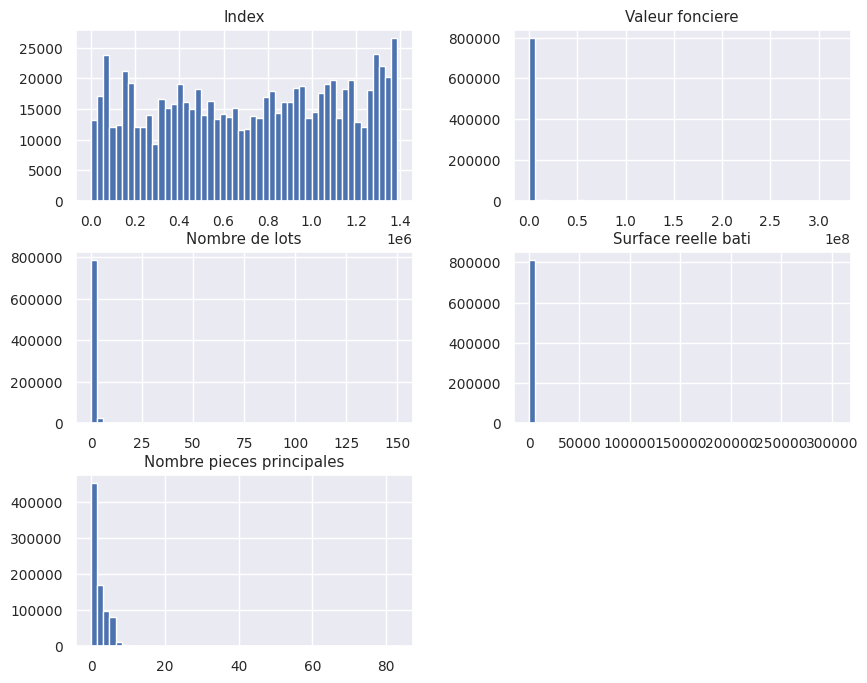

In [17]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(10,8))
plt.show()

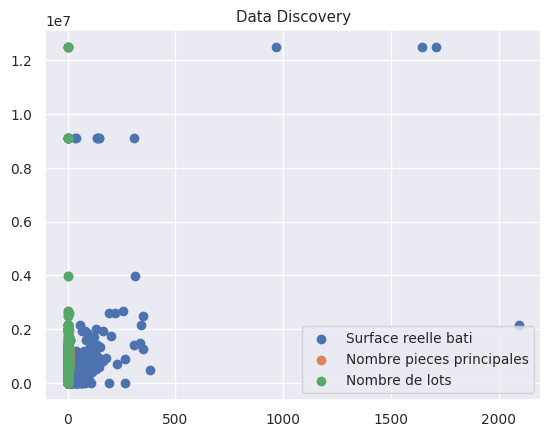

In [18]:
df_paris11=df[(df['Commune'] == 'PARIS 11')]
plt.scatter(df_paris11['Surface reelle bati'], df_paris11['Valeur fonciere'], label='Surface reelle bati')
plt.scatter(df_paris11['Nombre pieces principales'], df_paris11['Valeur fonciere'], label='Nombre pieces principales')
plt.scatter(df_paris11['Nombre de lots'], df_paris11['Valeur fonciere'], label='Nombre de lots')
plt.title('Data Discovery')
plt.legend()
plt.show()

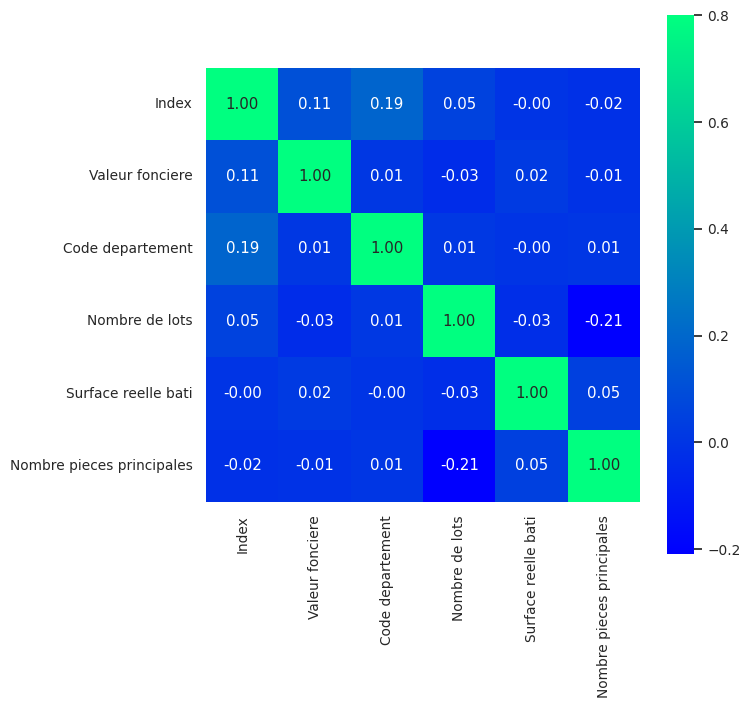

In [19]:
import seaborn as sns
df_colinearity=df.drop(columns=['Commune', 'Section'])
corrmat = df_colinearity.corr()
#'Nombre pieces principales' and 'Surface reelle bati' are strongly corelated > try  to keep one only

f, ax = plt.subplots(figsize=(7,7))
sns.set(font_scale=0.9)
sns.heatmap(corrmat, vmax=.8,square=True, annot=True, fmt=".2f", cmap = "winter")
plt.show()